# Loading File

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from keras.applications.mobilenet import MobileNet
from keras.applications.resnet import ResNet50
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling1D, BatchNormalization, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from google.colab import drive
from sklearn.preprocessing import StandardScaler
drive.mount('/content/drive')

%cd /content/drive/MyDrive/SLO/SLO-main/

data = pd.read_csv('data_cancer.csv')

FEATURES = data.drop(["diagnosis", "Unnamed: 32"], axis = 1)
TARGET = data["diagnosis"]
lb = LabelEncoder()
TARGET = lb.fit_transform(TARGET)
FEATURES = StandardScaler().fit_transform(FEATURES)
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_scene_mobileNet.h5',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/SLO/SLO-main


# Reduksi & Pelatihan Model

PCA

In [24]:
pca = decomposition.PCA(n_components=5)
print(FEATURES.shape)
FEATURESPCA = pca.fit(FEATURES).transform(FEATURES)
print(FEATURES.shape)
X_train, X_test, Y_train, Y_test = train_test_split(
    FEATURESPCA,
    TARGET,
    test_size = 0.2,
    stratify = TARGET
)
model1 = Sequential(
    [
    Flatten(input_shape=(5,)),
    Dense(128, activation="sigmoid"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(4, activation="sigmoid"),
    Dense(1,activation = "sigmoid"),
    ]
)
model1.summary()

print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3/1000)
model1.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
H1 = model1.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=1000, batch_size=32, callbacks=[es, checkpoint])

(569, 31)
(569, 31)
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_84 (Dense)             (None, 128)               768       
_________________________________________________________________
dense_85 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_86 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_87 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_88 (Dense)             (Non

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/1000
15/15 [==============================] - 2s 34ms/step - loss: 0.7450 - accuracy: 0.3681 - val_loss: 0.6902 - val_accuracy: 0.3684

Epoch 00001: val_loss improved from inf to 0.69016, saving model to best_weight_scene_mobileNet.h5
Epoch 2/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.6667 - val_loss: 0.6794 - val_accuracy: 0.6491

Epoch 00002: val_loss improved from 0.69016 to 0.67939, saving model to best_weight_scene_mobileNet.h5
Epoch 3/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6780 - accuracy: 0.6933 - val_loss: 0.6630 - val_accuracy: 0.7632

Epoch 00003: val_loss improved from 0.67939 to 0.66298, saving model to best_weight_scene_mobileNet.h5
Epoch 4/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6575 - accuracy: 0.7829 - val_loss: 0.6204 - val_accuracy: 0.9649

Epoch 00004: val_loss improved from 0.66298 to 0.62040, saving model to best_weight_scene_mobileNet.h5
Epoch 5/1000
15/15 

LDA

In [25]:
lda = LinearDiscriminantAnalysis(n_components=1)
FEATURESLDA = lda.fit(FEATURES, TARGET).transform(FEATURES)
X_train, X_test, Y_train, Y_test = train_test_split(
    FEATURESLDA,
    TARGET,
    test_size = 0.2,
    stratify = TARGET
)

model2 = Sequential(
    [
    Flatten(input_shape=(1,)),
    Dense(128, activation="sigmoid"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(4, activation="sigmoid"),
    Dense(1,activation = "sigmoid"),
    ]
)
model2.summary()

print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3/1000)
model2.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
H2 = model2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=1000, batch_size=32, callbacks=[es, checkpoint])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 1)                 0         
_________________________________________________________________
dense_91 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_92 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_93 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_13 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_94 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_95 (Dense)             (None, 8)               

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


15/15 [==============================] - 2s 33ms/step - loss: 0.7586 - accuracy: 0.3865 - val_loss: 0.6665 - val_accuracy: 0.6316

Epoch 00001: val_loss did not improve from 0.13069
Epoch 2/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6604 - accuracy: 0.6314 - val_loss: 0.6399 - val_accuracy: 0.6316

Epoch 00002: val_loss did not improve from 0.13069
Epoch 3/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6452 - accuracy: 0.6193 - val_loss: 0.6189 - val_accuracy: 0.6316

Epoch 00003: val_loss did not improve from 0.13069
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6141 - accuracy: 0.6656 - val_loss: 0.5666 - val_accuracy: 0.8947

Epoch 00004: val_loss did not improve from 0.13069
Epoch 5/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.5535 - accuracy: 0.9242 - val_loss: 0.4976 - val_accuracy: 0.9123

Epoch 00005: val_loss did not improve from 0.13069
Epoch 6/1000
15/15 [======================

FA

In [26]:
FA = decomposition.FactorAnalysis(n_components=5)
FEATURESFA = FA.fit(FEATURES).transform(FEATURES)
X_train, X_test, Y_train, Y_test = train_test_split(
    FEATURESFA,
    TARGET,
    test_size = 0.2,
    stratify = TARGET
)

model3 = Sequential(
    [
    Flatten(input_shape=(5,)),
    Dense(128, activation="sigmoid"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(4, activation="sigmoid"),
    Dense(1,activation = "sigmoid"),
    ]
)
model3.summary()

print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3/1000)
model3.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
H3 = model3.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=1000, batch_size=32, callbacks=[es, checkpoint])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_98 (Dense)             (None, 128)               768       
_________________________________________________________________
dense_99 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_100 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_101 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_102 (Dense)            (None, 8)               

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


15/15 [==============================] - 2s 33ms/step - loss: 0.7752 - accuracy: 0.3677 - val_loss: 0.7337 - val_accuracy: 0.3684

Epoch 00001: val_loss did not improve from 0.09727
Epoch 2/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.7207 - accuracy: 0.3976 - val_loss: 0.6917 - val_accuracy: 0.4298

Epoch 00002: val_loss did not improve from 0.09727
Epoch 3/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.5957 - val_loss: 0.6648 - val_accuracy: 0.6316

Epoch 00003: val_loss did not improve from 0.09727
Epoch 4/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6663 - accuracy: 0.6272 - val_loss: 0.6501 - val_accuracy: 0.6316

Epoch 00004: val_loss did not improve from 0.09727
Epoch 5/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6592 - accuracy: 0.6159 - val_loss: 0.6426 - val_accuracy: 0.6316

Epoch 00005: val_loss did not improve from 0.09727
Epoch 6/1000
15/15 [======================

# Perbandingan Neural Network


PCA


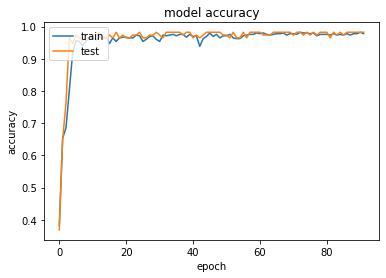

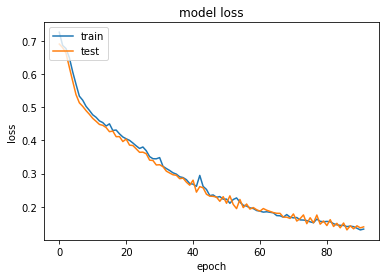

In [27]:
# summarize history for accuracy
plt.plot(H1.history['accuracy'])
plt.plot(H1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H1.history['loss'])
plt.plot(H1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

LDA

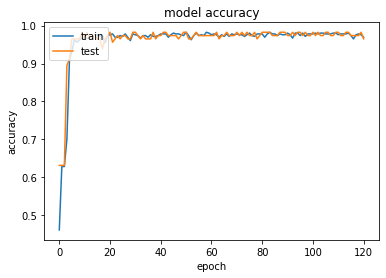

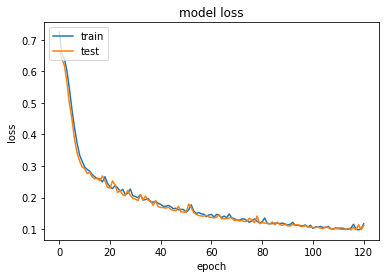

In [28]:
# summarize history for accuracy
plt.plot(H2.history['accuracy'])
plt.plot(H2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H2.history['loss'])
plt.plot(H2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

FA

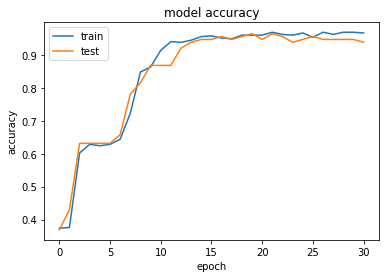

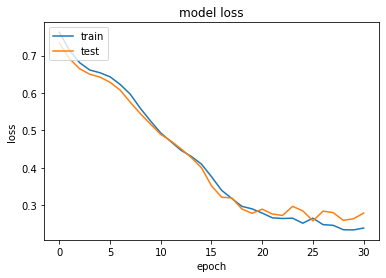

In [29]:
# summarize history for accuracy
plt.plot(H3.history['accuracy'])
plt.plot(H3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H3.history['loss'])
plt.plot(H3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Tingkat akurasi terbaik dicapai oleh PCA dengan loss yang  cukup baik juga (Accu=.9825, loss=.1398). 
Dilanjutkan oleh LDA(Accu=.9649, loss=.1110), dan performa terburuk dari nilai loss maupun akurasi dicapai oleh FA(Accu=.9386, loss=.2794).

Komponen PCA dan FA di set menjadi 5 komponen, komponen LDA maksimal 1 karna LDA memiliki batas komponen n-class(2)-1.
Apabila nilai komponen diperbanyak maka performa FA akan menjadi lebih baik dibandingkan dengan PCA. Dari percobaan saya, saya lihat bahwa PCA akan memiliki hasil yang lebih baik apabila nilai komponen diperkecil, sedangkan FA akan memiliki hasil yang lebih baik apabila jumlah komponen diperbanyak.